# Lecture 10: Classification and Logistic Regression

In [1]:
%matplotlib inline
import sys
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import sklearn.linear_model as sk

/home/charles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


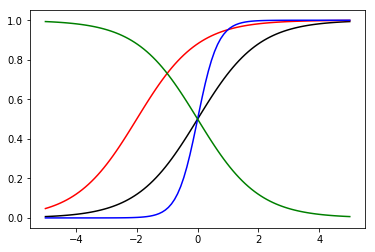

In [2]:
x = np.linspace(-5, 5, 100)
y1 = np.exp(0+1*x)/(1+np.exp(0+1*x))
y2 = np.exp(2+1*x)/(1+np.exp(2+1*x))
y3 = np.exp(0+3*x)/(1+np.exp(0+3*x))
y4 = np.exp(0-1*x)/(1+np.exp(0-1*x))


plt.plot(x,y1,color='black')
plt.plot(x,y2,color='red')
plt.plot(x,y3,color='blue')
plt.plot(x,y4,color='green')

plt.show()

In [3]:
import random
random.seed(12345)

#read the NFL play-by-play data
nfldata = pd.read_csv("NFLplaybyplay-2015.csv")

# shuffle the data
nfldata = nfldata.reindex(np.random.permutation(nfldata.index))

# For simplicity, we will select only 500 points form the dataset.
N = 500
nfldata_sm = nfldata.sample(N)
nfldata_sm.head()


#genomicdata = pd.read_csv("genomic_subset.csv")
#genomicdata.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
45742,2016010301,1/3/16,2,3,53,NE,MIA,1,10,52,...,0,0,NaN,48,OPP,1,MIA,1,DEFENSIVE PASS INTERFERENCE,24
37366,2015120609,12/6/15,4,2,4,ARI,STL,1,10,65,...,0,0,RIGHT TACKLE,35,OPP,0,NaN,0,NaN,0
43640,2015120603,12/6/15,2,9,25,CIN,CLE,1,10,57,...,0,0,NaN,43,OPP,1,CLE,0,FACE MASK (15 YARDS),15
19273,2015101107,10/11/15,4,9,3,GB,STL,1,10,20,...,0,0,NaN,20,OWN,0,NaN,0,NaN,0
11103,2015092007,9/20/15,1,3,24,DET,MIN,2,7,23,...,0,0,NaN,23,OWN,1,DET,1,OFFENSIVE HOLDING,10


Estimated beta1: 
 [[ 0.0490699]]
Estimated beta0: 
 [-6.43292158]


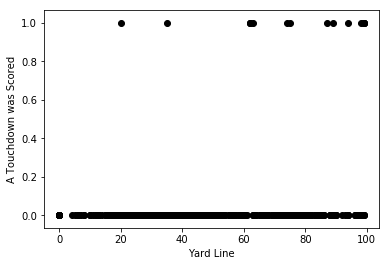

In [8]:

# The following function creates the polynomial design matrix.
def polynomial_basis(x, degree):
    p = np.arange(1, degree + 1)
    return x[:, np.newaxis] ** p

# We create the design matrix of a polynomial of 1 degree.
X = polynomial_basis (nfldata_sm["YardLine"], 1)

plt.scatter(nfldata_sm["YardLine"],nfldata_sm["IsTouchdown"],  color='black')
plt.xlabel("Yard Line")
plt.ylabel("A Touchdown was Scored")
#plt.plot(x, logitm.predict_proba(x)[:,1],  color='red' , lw=3)
#plt.show()

# Create linear regression object
lm = sk.LinearRegression()
lm.fit(X, nfldata_sm["IsTouchdown"])

# The coefficients
#print('Coefficients: \n', lm.coef_)

# Create logistic regression object
logitm = sk.LogisticRegression(C = 1000000)
logitm.fit(X, nfldata_sm["IsTouchdown"])

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

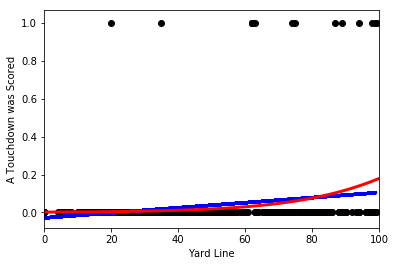

In [9]:

# Plot outputs
plt.scatter(nfldata_sm["YardLine"], nfldata_sm["IsTouchdown"],  color='black')
plt.xlim(0,100)
plt.plot(X, lm.predict(X), color='blue',lw=3)
x = np.linspace(0, 300, 100)
x = polynomial_basis(x, 1)
#plt.plot(x, logitm.predict_proba(x),  color='red' , lw=3)
plt.plot(x, logitm.predict_proba(x)[:,1],  color='red' , lw=3)
plt.xlabel("Yard Line")
plt.ylabel("A Touchdown was Scored")

plt.show()


In [12]:
X2 = polynomial_basis(nfldata_sm["IsPass"], 1)
logitm.fit(X2,nfldata_sm["IsTouchdown"])

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Y=nfldata_sm["IsTouchdown"]
#passes=nfldata["IsPass"0]==0
print(np.mean(Y[nfldata["IsPass"]==0]))
print(np.mean(Y[nfldata["IsPass"]==1]))


Estimated beta1: 
 [[ 0.05688685]]
Estimated beta0: 
 [-3.43398669]
0.03125
0.0330188679245283


In [13]:
# Create data frame of predictors
X = nfldata[["YardLine","IsPass"]]

# Create logistic regression object
logitm = sk.LogisticRegression(C = 1000000)
logitm.fit(X, nfldata["IsTouchdown"])

# The coefficients
print('Estimated beta1, beta2: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1, beta2: 
 [[ 0.06547811  1.2066147 ]]
Estimated beta0: 
 [-8.30059191]


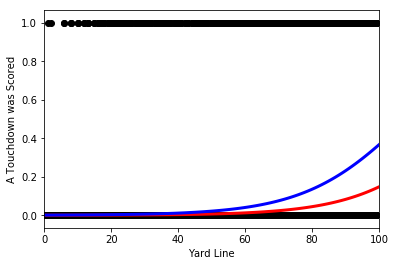

In [14]:
x = np.linspace(0, 100, 100)
x = polynomial_basis(x, 1)
x0 = np.insert(x,1,0,axis=1)
x1 = np.insert(x,1,1,axis=1)

# Plot outputs
plt.scatter(nfldata["YardLine"],nfldata["IsTouchdown"],  color='black')
plt.plot(x, logitm.predict_proba(x0)[:,1],  color='red' , lw=3)
plt.plot(x, logitm.predict_proba(x1)[:,1],  color='blue' , lw=3)
plt.xlabel ("Yard Line")
plt.ylabel("A Touchdown was Scored")
plt.xlim(0,100)
plt.show()

In [15]:
# Create data frame of predictors
nfldata['Interaction'] = nfldata["YardLine"]*nfldata["IsPass"]
X = nfldata[["YardLine","IsPass","Interaction"]]

# Create logistic regression object
logitm = sk.LogisticRegression(C = 100000000000000000)
logitm.fit (X, nfldata["IsTouchdown"])

# The coefficients
print('Estimated beta1, beta2, beta3: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

nfldata['Intercept'] = 1.0
logit_sm = sm.Logit(nfldata['IsTouchdown'], nfldata[["Intercept","YardLine","IsPass","Interaction"]])
fit_sm = logit_sm.fit()
print(fit_sm.summary())

nfldata.head()

Estimated beta1, beta2, beta3: 
 [[ 0.06769992  1.46499967 -0.00319916]]
Estimated beta0: 
 [-8.48339236]
Optimization terminated successfully.
         Current function value: 0.102461
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            IsTouchdown   No. Observations:                46277
Model:                          Logit   Df Residuals:                    46273
Method:                           MLE   Df Model:                            3
Date:                Sat, 28 Oct 2017   Pseudo R-squ.:                  0.2503
Time:                        10:05:11   Log-Likelihood:                -4741.6
converged:                       True   LL-Null:                       -6324.5
                                        LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,Interaction,Intercept
21214,2015101804,10/18/15,4,0,51,BUF,CIN,3,20,46,...,NaN,46,OWN,0,NaN,0,NaN,0,46,1.0
40948,2015122706,12/27/15,4,4,33,MIN,NYG,2,2,28,...,CENTER,28,OWN,0,NaN,0,NaN,0,0,1.0
44473,2015122003,12/20/15,2,0,46,JAC,ATL,1,10,55,...,NaN,45,OPP,0,NaN,0,NaN,0,55,1.0
37658,2015120612,12/6/15,3,11,35,PHI,NE,1,10,6,...,NaN,6,OWN,0,NaN,0,NaN,0,6,1.0
18979,2015101106,10/11/15,1,15,0,BUF,TEN,0,0,35,...,NaN,35,OWN,1,BUF,1,OFFSIDE ON FREE KICK,5,0,1.0


In [20]:
sense = 0.9
prev = 0.001
pdisease = (sens * prev)/(sense*prev + (1-sense)*(1-prev))
pdisease

0.008928571428571432